# Confidence interval of counted data

## The Poisson distribution

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss

In [7]:
a = np.random.poisson(1.6, size=10000) # e.g. mean radiation counts/min
b = np.random.poisson(7.5, size=10000)

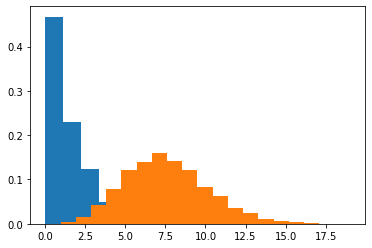

In [8]:
_ = plt.hist(a, bins=8, density=True)
_ = plt.hist(b, bins=20, density=True);

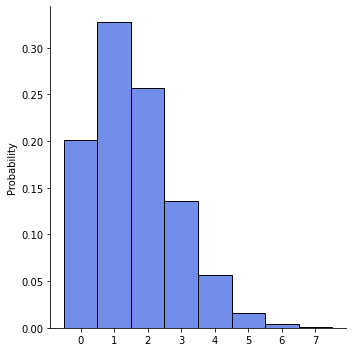

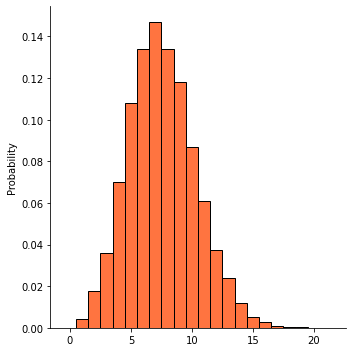

In [11]:
np.random.seed(444)
sns.displot(ss.poisson(1.6).rvs(size=10000), stat='probability', binwidth=1, discrete=True, color='royalblue')
sns.displot(ss.poisson(7.5).rvs(size=10000), stat='probability', binwidth=1, discrete=True, color='orangered');

## Teh case of raisins in bagels

In [1]:
raisins = 10 # average number of raisins per bagel

In [13]:
dist = ss.poisson(mu=raisins).rvs(size=10000)
conf_int = np.percentile(dist, [2.5, 97.5])
print(f'95% confidence interval for 10 raisins in bagel is {conf_int}')

95% confidence interval for 10 raisins in bagel is [ 4. 17.]


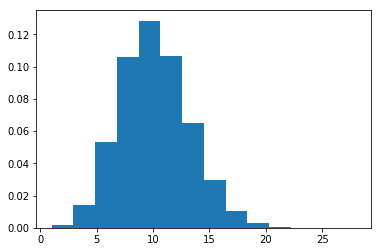

In [24]:
_ = plt.hist(dist, bins=14, normed=True);

In [21]:
model = ss.poisson(mu=raisins)
model.ppf(0.025), model.ppf(0.975) # percent point function

(4.0, 17.0)

In [15]:
# method used for large count values (i.e. >=25), but looks like it also work fine with count = 10
raisins - 1.96 * raisins**.5 , raisins + 1.96 * raisins**.5

(3.8019357860699765, 16.198064213930024)

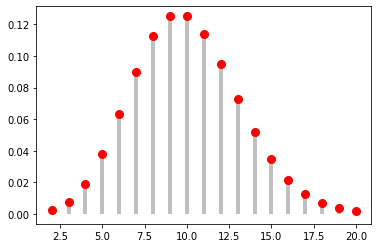

In [19]:
x = np.arange(
    model.ppf(0.001),
    model.ppf(0.999),
    step=1)

plt.plot(x, model.pmf(x), 'ro', ms=8)
plt.vlines(x, 0, model.pmf(x), colors='grey', lw=4, alpha=.5);

## The case of radioactive count

In [20]:
desintegr = 120

In [26]:
poisson_radio = ss.poisson(mu=desintegr)
radio_dist =poisson_radio.rvs(size=10000)
np.percentile(radio_dist, [2.5, 97.5])

array([ 99., 143.])

In [46]:
poisson_radio.stats(moments='m') # mean

array(120.)

In [47]:
poisson_radio.mean()

120.0

In [27]:
poisson_radio.ppf(0.025),poisson_radio.ppf(0.975)

(99.0, 142.0)

In [29]:
poisson_radio.interval(alpha = .95)

(99.0, 142.0)

In [32]:
# method used for large count values (i.e. >=25) because it approximates Gaussian distribution
desintegr - 1.96 * desintegr**.5 , desintegr + 1.96 * desintegr**.5

(98.52927574579749, 141.4707242542025)

## More examples

In [34]:
ss.poisson.interval(alpha=.95, mu=1.6)
# count 1.6 deaths for 1000 person-years

(0.0, 4.0)

In [32]:
ss.poisson.interval(.95, 16)
# count 16 event for 10000

(9.0, 24.0)

In [35]:
ss.poisson.interval(.95, 160)
# count 160 event for 100000

(136.0, 185.0)

important to compute the CI using the actual counts, and then divide by the 'volume' counting for a longer time interval (or volume) narrows the CI

In [36]:
a_counts = np.random.poisson(700, 20)

In [37]:
b_counts = np.random.poisson(7000, 20)

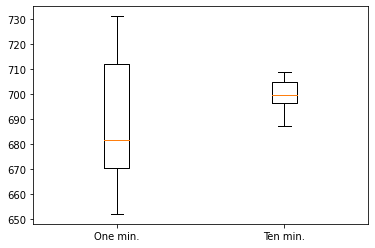

In [38]:
_ = plt.boxplot([a_counts, b_counts/10])
plt.xticks((1, 2), ('One min.', 'Ten min.'));

In [39]:
np.percentile([9, 7, 13, 12, 10, 9, 10], [2.5, 97.5])

array([ 7.3 , 12.85])

In [56]:
poisson.interval(.95, 10)

(4.0, 17.0)

## What if observed number is 0?

In [41]:
ss.poisson.interval(.95, 0.1)

(0.0, 1.0)

In [42]:
zero = ss.poisson(mu=0.1).rvs(size = 100000)

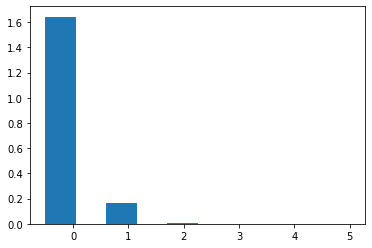

In [44]:
_ = plt.hist(zero, range=(-.5, 5), density=True);

In [64]:
np.percentile(zero, [2.5, 97.5])

array([0., 0.])